In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/auto-mpg.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
copy=df.duplicated()

In [ ]:
print(copy.sum())

0


In [ ]:
def remove_outliers(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    return lower_range,upper_range

In [ ]:
low_leadtime,high_leadtime=remove_outliers(df["acceleration"])
df["acceleration"]=np.where(df["acceleration"]>high_leadtime,high_leadtime,df["acceleration"])
df["acceleration"]=np.where(df["acceleration"]<low_leadtime,low_leadtime,df["acceleration"])

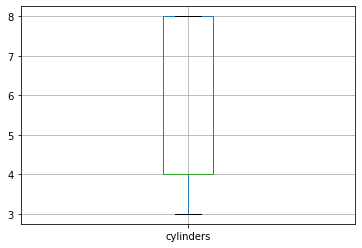

In [ ]:
df.boxplot(column=["cylinders"])

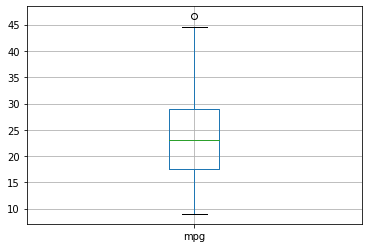

In [ ]:
df.boxplot(column=["mpg"])

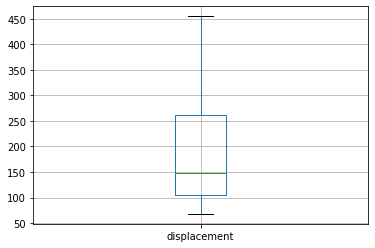

In [ ]:
df.boxplot(column=["displacement"])

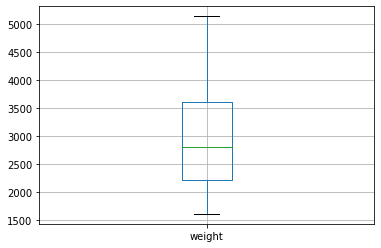

In [ ]:
df.boxplot(column=["weight"])

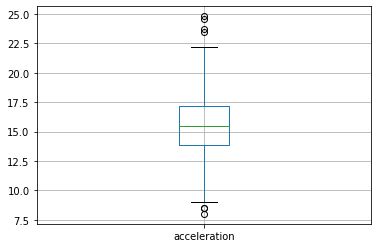

In [ ]:
df.boxplot(column=["acceleration"])

In [ ]:
low_leadtime,high_leadtime=remove_outlier(df["acceleration"])
df["acceleration"]=np.where(df["acceleration"]>high_leadtime,high_leadtime,df["acceleration"])
df["acceleration"]=np.where(df["acceleration"]<low_leadtime,low_leadtime,df["acceleration"])

NameError: ignored

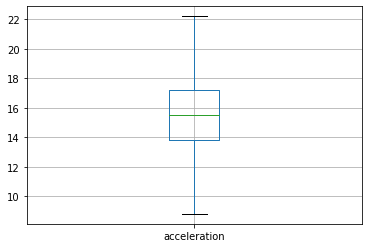

In [ ]:
df.boxplot(column="acceleration")

In [ ]:
def remove_outliers(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    return lower_range,upper_range

In [ ]:
low_leadtime,high_leadtime=remove_outliers(df["mpg"])
df["mpg"]=np.where(df["mpg"]>high_leadtime,high_leadtime,df["mpg"])
df["mpg"]=np.where(df["mpg"]<low_leadtime,low_leadtime,df["mpg"])

In [ ]:
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.8,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.8,70,1,amc ambassador dpl


In [ ]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [ ]:
df.describe(include="all")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.513693,5.454774,193.425879,NaN,2970.424623,15.552010,76.010050,1.572864,NaN
std,7.813400,1.701004,104.269838,NaN,846.841774,2.693089,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.800000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


In [ ]:
df.tail(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
388,26.0,4,156.0,92,2585,14.5,82,1,chrysler lebaron medallion
389,22.0,6,232.0,112,2835,14.7,82,1,ford granada l
390,32.0,4,144.0,96,2665,13.9,82,3,toyota celica gt
391,36.0,4,135.0,84,2370,13.0,82,1,dodge charger 2.2
392,27.0,4,151.0,90,2950,17.3,82,1,chevrolet camaro
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,22.2,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [ ]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
262,19.2,8,305.0,145,3425,13.2,78,1,chevrolet monte carlo landau
231,15.5,8,400.0,190,4325,12.2,77,1,chrysler cordoba
38,14.0,8,350.0,165,4209,12.0,71,1,chevrolet impala
218,36.0,4,79.0,58,1825,18.6,77,2,renault 5 gtl
37,18.0,6,232.0,100,3288,15.5,71,1,amc matador
113,21.0,6,155.0,107,2472,14.0,73,1,mercury capri v6
297,25.4,5,183.0,77,3530,20.1,79,2,mercedes benz 300d
140,14.0,8,304.0,150,4257,15.5,74,1,amc matador (sw)
45,18.0,6,258.0,110,2962,13.5,71,1,amc hornet sportabout (sw)
259,20.8,6,200.0,85,3070,16.7,78,1,mercury zephyr


In [ ]:
df.sample(100)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
254,20.2,6,200.0,85,2965,15.8,78,1,ford fairmont (auto)
146,28.0,4,90.0,75,2125,14.5,74,1,dodge colt
270,21.1,4,134.0,95,2515,14.8,78,3,toyota celica gt liftback
109,21.0,4,140.0,72,2401,19.5,73,1,chevrolet vega
381,36.0,4,107.0,75,2205,14.5,82,3,honda accord
...,...,...,...,...,...,...,...,...,...
350,34.7,4,105.0,63,2215,14.9,81,1,plymouth horizon 4
30,28.0,4,140.0,90,2264,15.5,71,1,chevrolet vega 2300
57,24.0,4,113.0,95,2278,15.5,72,3,toyota corona hardtop
164,21.0,6,231.0,110,3039,15.0,75,1,buick skyhawk


In [10]:
df.describe(include="all")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000


In [12]:
df["horsepower"]=df["horsepower"].replace("?",np.nan)
df["horsepower"]=df["horsepower"].astype(float)

In [13]:
median1=df["horsepower"].median()

In [14]:
df["horsepower"].replace(np.nan,median1,inplace=True)

In [15]:
df.describe(include="all")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [3]:
df.drop("car name",axis=1,inplace=True)

In [5]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
317,34.3,4,97.0,78,2188,15.8,80,2
153,18.0,6,250.0,105,3459,16.0,75,1
213,13.0,8,350.0,145,4055,12.0,76,1
139,14.0,8,302.0,140,4638,16.0,74,1
269,30.9,4,105.0,75,2230,14.5,78,1
120,19.0,4,121.0,112,2868,15.5,73,2
101,23.0,6,198.0,95,2904,16.0,73,1
283,20.2,6,232.0,90,3265,18.2,79,1
386,25.0,6,181.0,110,2945,16.4,82,1
206,26.5,4,140.0,72,2565,13.6,76,1


In [6]:
df['origin']=df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})

In [7]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
204,32.0,4,85.0,70,1990,17.0,76,asia
363,22.4,6,231.0,110,3415,15.8,81,america
11,14.0,8,340.0,160,3609,8.0,70,america
184,25.0,4,140.0,92,2572,14.9,76,america
17,21.0,6,200.0,85,2587,16.0,70,america
147,24.0,4,90.0,75,2108,15.5,74,europe
356,32.4,4,108.0,75,2350,16.8,81,asia
102,26.0,4,97.0,46,1950,21.0,73,europe
20,25.0,4,110.0,87,2672,17.5,70,europe
256,20.5,6,225.0,100,3430,17.2,78,america


In [ ]:
df=pd.get_dummies(df,columns=['origin'])
df.sample(10)

In [9]:
df.isnull().sum()

mpg               0
cylinders         0
displacement      0
horsepower        0
weight            0
acceleration      0
model year        0
origin_america    0
origin_asia       0
origin_europe     0
dtype: int64

In [16]:
df.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower        float64
weight              int64
acceleration      float64
model year          int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

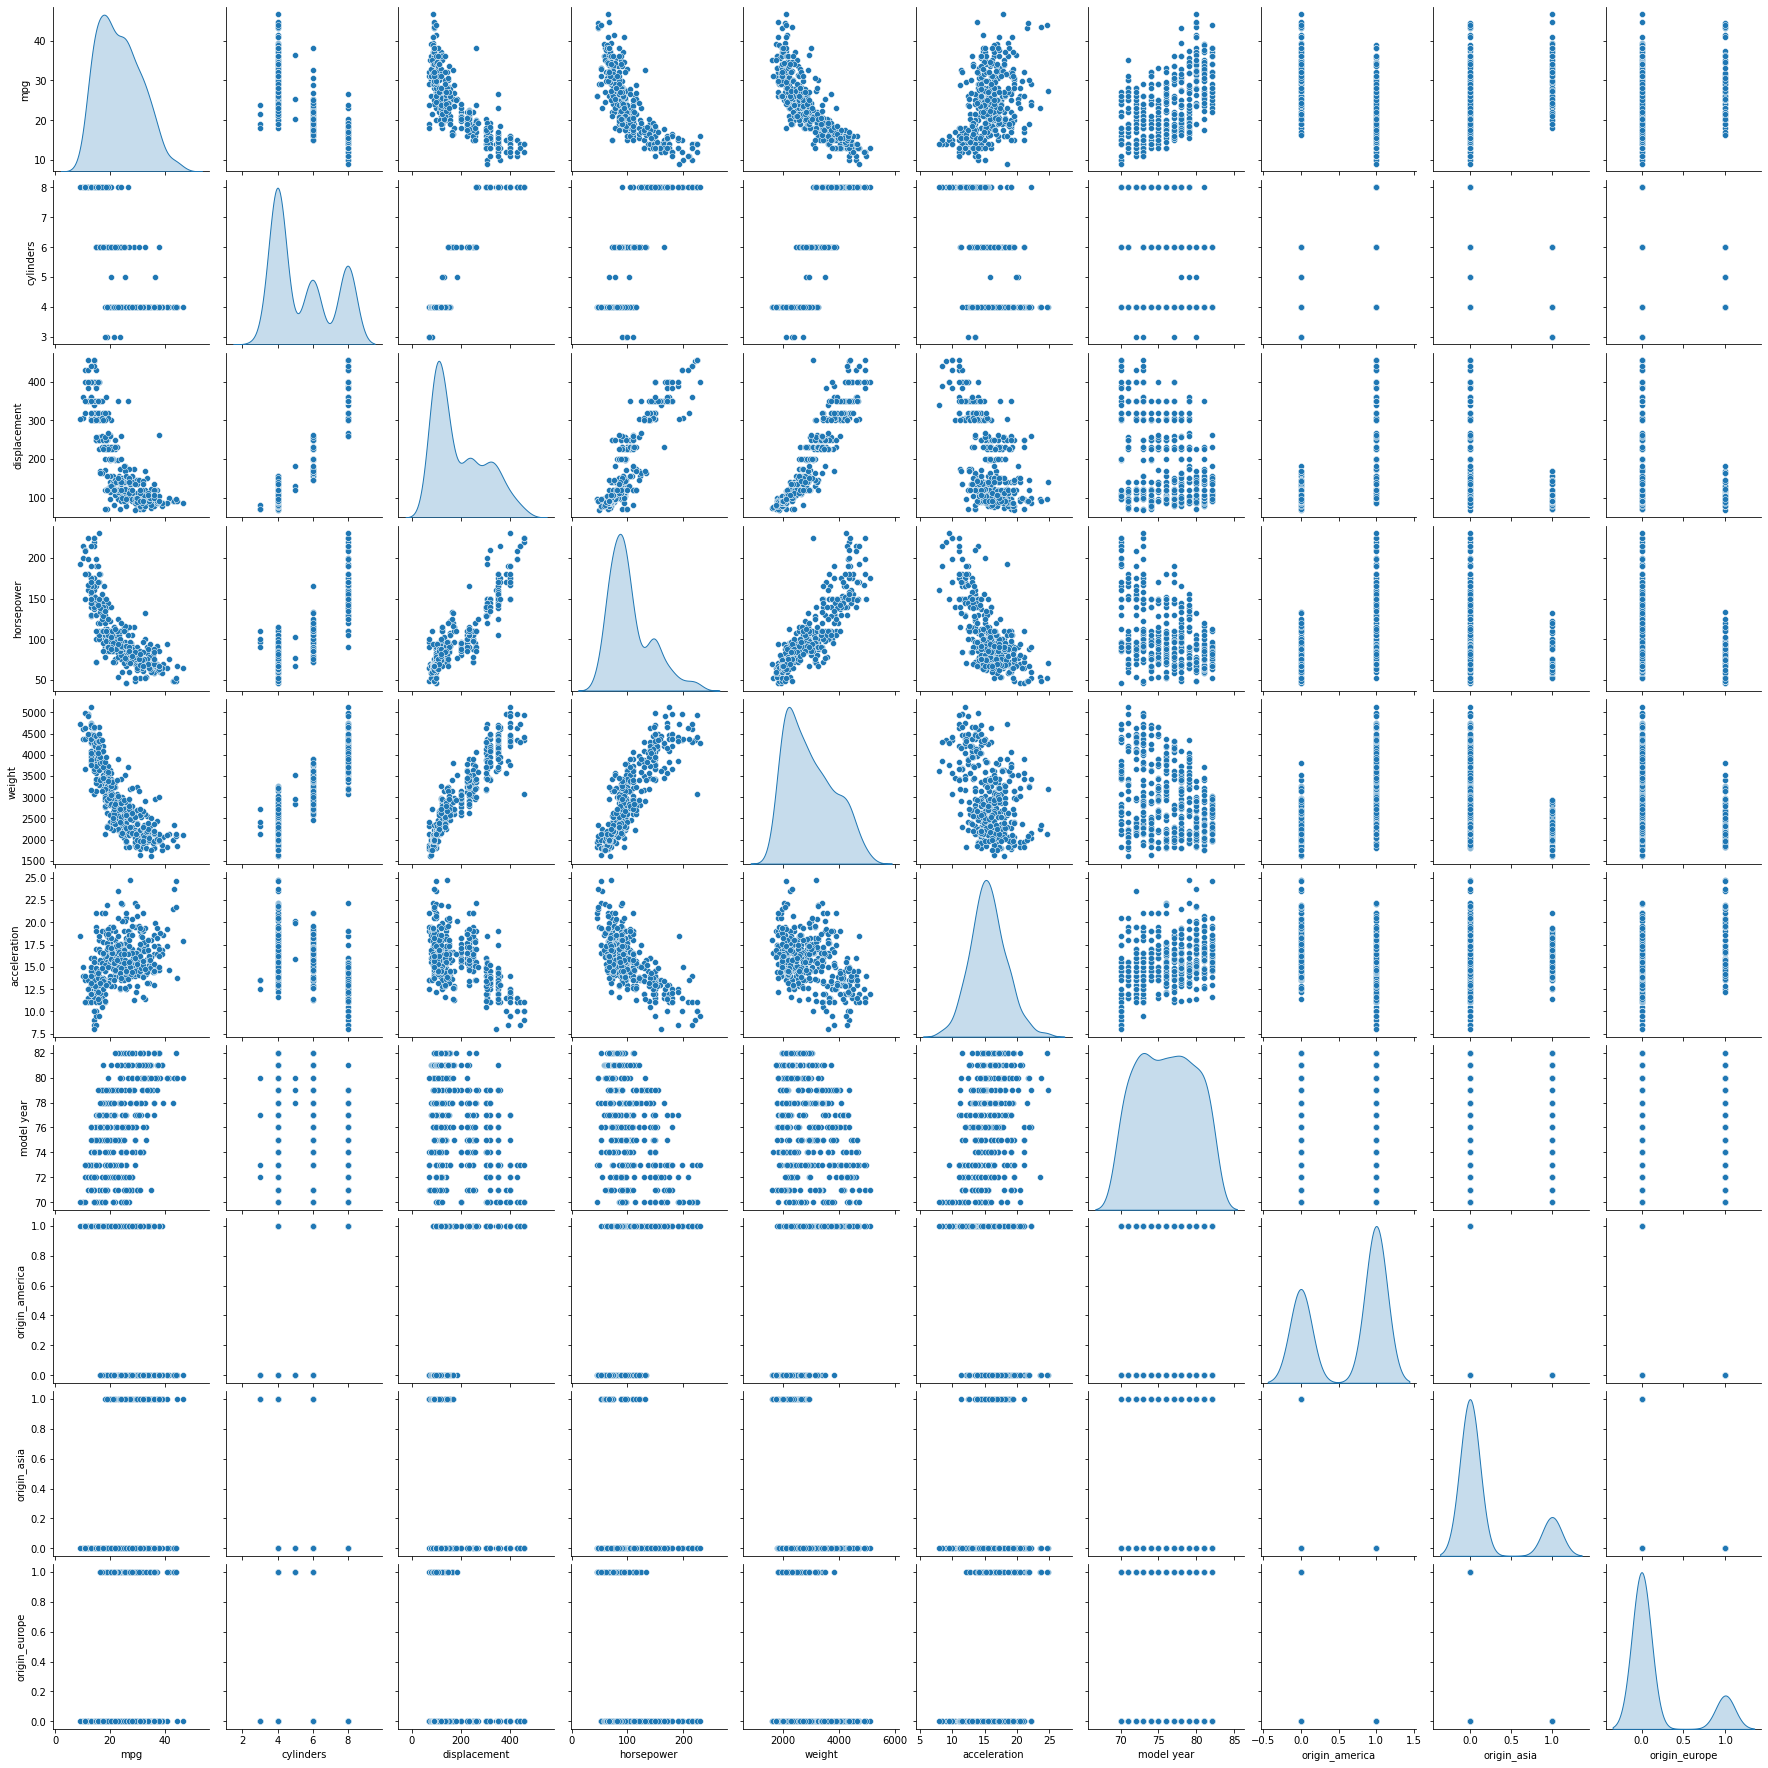

In [17]:
sns.pairplot(df,diag_kind="kde")

In [18]:
#Building Linear Model
#independent Variables
X = df.drop(['mpg'],axis=1)
#dependent variables
Y = df[['mpg']]

#split X any Y into training and test set in 70:30 ratio

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1) 

In [19]:
model_1 = LinearRegression()
model_1.fit(X_train, Y_train)



LinearRegression()

In [20]:
model_1.score(X_train, Y_train)


0.8141025501610559

Represents good model

In [21]:
model_1.score(X_test, Y_test)

0.8433135132808827

Represents good model